# simple linear regression model with Skit-learn for predict 


#### Dataset is based on e-counter dara is not available here

In [16]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv('week1_all.csv')
#df.head(4)
df.info()
#df.columns
#df.drop(['Location'], axis=1, inplace=True )
#df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21938 entries, 0 to 21937
Data columns (total 9 columns):
Date             21938 non-null object
Time             21938 non-null object
Count            21938 non-null int64
Status           21938 non-null int64
Sensor           21938 non-null object
Type             21938 non-null object
Position         21938 non-null int64
Location         21938 non-null object
Location Code    21938 non-null object
dtypes: int64(3), object(6)
memory usage: 1.5+ MB


# show the distribution of each columns


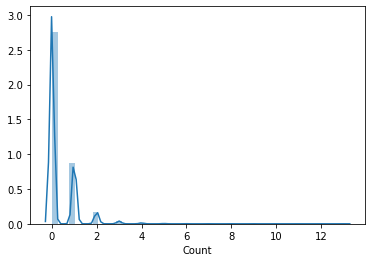

In [3]:
dist1=sns.distplot(df.Count)

#dist2 = sns.distplot(df.Position)

#dist2 = sns.distplot(df.Status)


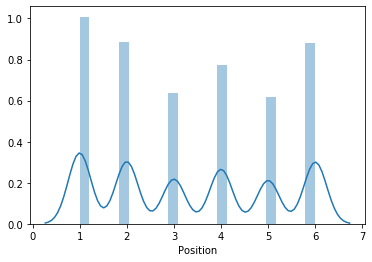

In [4]:
dist2 = sns.distplot(df.Position)


## which features are more corelative and highly predictable
### explore relationship between predictors and response


TypeError: can't multiply sequence by non-int of type 'float'

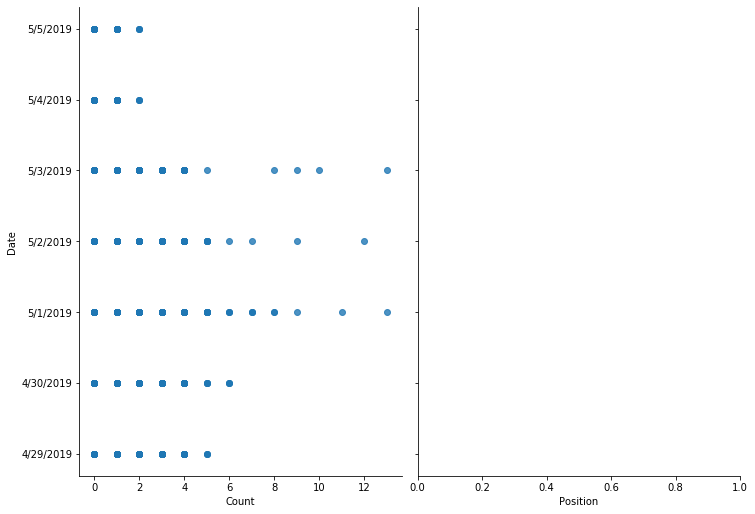

In [5]:

sns.pairplot(df, x_vars= ['Count', 'Position'], y_vars= 'Date' , height = 7, aspect= 0.7, kind = 'reg')

### Correlation ; which feature is better to compare?? and then model it

In [6]:
df.Count.corr(df.Count)

df.corr()


,Count,Status,Position
Count,1.000000,0.023319,-0.082680
Status,0.023319,1.000000,0.028699
Position,-0.082680,0.028699,1.000000


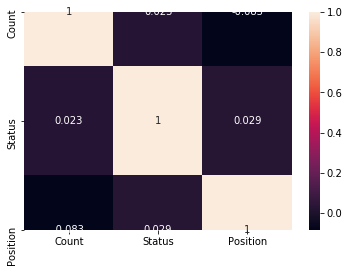

In [7]:


#code below show non of them have good relation to compare!!!!!!It is better to close to number 1, redish color
sns.heatmap(df.corr(), annot=True)

# Creating simple linear Regression model

In [8]:
# x : feature metrix - dataframe(Matrix)
# y : response vector to be numpy array- series(Vector)

x = df[['Count']]
x.head()
print(type(x))
print(x.shape)


<class 'pandas.core.frame.DataFrame'>
(21938, 1)


In [9]:

#target vector y
y = df.Count
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(21938,)


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [13]:
print(x_train.shape)
print(x_test. shape)
print(y_train.shape)
print(y_test.shape)

(16453, 1)
(5485, 1)
(16453,)
(5485,)


the train and test ratio is 75% to 25%


In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

# interpreting model coefficients

In [15]:
print(linreg.intercept_)
print(linreg.coef_)

#>>!!!!????????NOT GOOD

-5.440092820663267e-15
[1.]


# Making prediction with the above model

In [17]:
y_predc = linreg.predict(x_test)
y_predc[ : 5]

array([-5.44009282e-15, -5.44009282e-15,  1.00000000e+00,  2.00000000e+00,
        1.00000000e+00])

# Model Evaluation Metrics

### 3 main Ev metrics for linear regression(finding errors)
#### 1- Mean Absolute Error (MAE)


In [22]:
from sklearn import metrics

print(metrics.mean_absolute_error(y_test,y_predc))

8.02526282033693e-15


#### 2- Mean Squared Error(MSE)


In [23]:
print(metrics.mean_squared_error(y_test,y_predc))

1.208821201463942e-28


#### 3- Root Mean Squared Error (RMSE)

In [24]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_predc)))

1.099464051919817e-14
